In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
!ls "/ecg_data"

a01.apn    a10.qrs		       b03.xws	  c09.xws	   x17.hea
a01.dat    a10.xws		       b04.apn	  c10.apn	   x17.qrs
a01er.apn  a11.apn		       b04.dat	  c10.dat	   x17.xws
a01er.hea  a11.dat		       b04.hea	  c10.hea	   x18.dat
a01er.qrs  a11.hea		       b04.qrs	  c10.qrs	   x18.hea
a01er.xws  a11.qrs		       b04.xws	  c10.xws	   x18.qrs
a01.hea    a11.xws		       b05.apn	  challenge	   x18.xws
a01.qrs    a12.apn		       b05.dat	  event-2-answers  x19.dat
a01r.apn   a12.dat		       b05.hea	  list		   x19.hea
a01r.dat   a12.hea		       b05.qrs	  RECORDS	   x19.qrs
a01r.hea   a12.qrs		       b05.xws	  SHA256SUMS.txt   x19.xws
a01.xws    a12.xws		       c01.apn	  x01.dat	   x20.dat
a02.apn    a13.apn		       c01.dat	  x01.hea	   x20.hea
a02.dat    a13.dat		       c01er.apn  x01.qrs	   x20.qrs
a02er.apn  a13.hea		       c01er.hea  x01.xws	   x20.xws
a02er.hea  a13.qrs		       c01er.qrs  x02.dat	   x21.dat
a02er.qrs  a13.xws		       c01er.xws  x02.hea	   x21.hea
a02er.xws  a14.apn		       c01.h

## ECG 데이터 형태 확인

In [ ]:
import numpy as np
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import os
import pickle
import csv

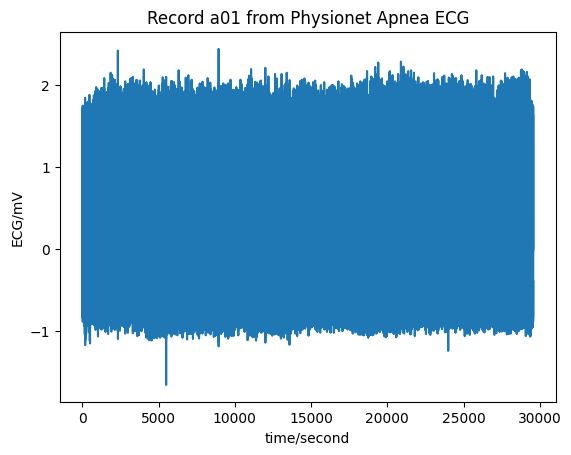

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2957000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [5827],
 'block_size': [0]}

In [ ]:
## ECG 데이터 형태 plot 확인하는 과정

os.listdir("/ecg_data")

record = wfdb.rdrecord('/ecg_data/a01')
wfdb.plot_wfdb(record, title='Record a01 from Physionet Apnea ECG')
display(record.__dict__)    #해당 데이터 레코드의 모든 속성과 그 값들을 출력

- rdrecord: rdrecord 함수는 레코드(record) 하나에 대한 정보를 읽어옵니다.
하나의 레코드(record)에는 여러 개의 신호 채널이 포함될 수 있습니다.
rdrecord 함수는 해당 레코드에 포함된 신호 데이터와 해당 레코드에 대한 메타데이터를 읽어옵니다.  
  

- rdsamp: rdsamp 함수는 하나 이상의 채널로 구성된 신호 데이터를 읽어옵니다.
여러 개의 채널을 가진 데이터의 경우, 해당 채널들의 데이터를 하나의 배열로 반환합니다.
rdsamp 함수는 주로 원시 신호 데이터를 배열로 변환하여 처리하는 데 사용됩니다.
따라서, rdrecord 함수는 하나의 레코드의 메타데이터와 해당 레코드의 모든 신호 데이터를 반환하고, rdsamp 함수는 여러 개의 채널로 구성된 신호 데이터를 배열로 반환합니다. 선택은 데이터 처리의 목적과 편의성에 따라 달라질 수 있습니다.

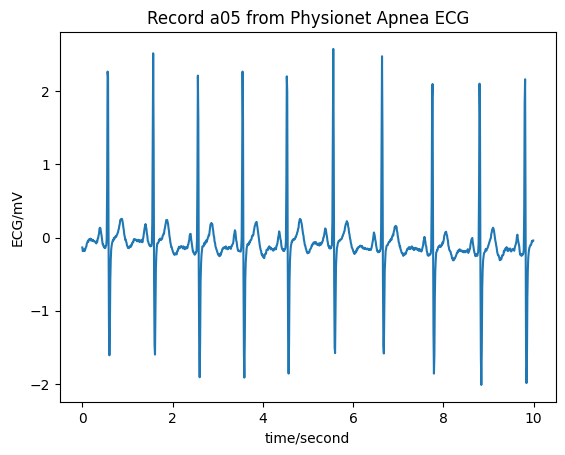

{'record_name': 'a05',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.135],
        [-0.185],
        [-0.175],
        [-0.185],
        [-0.16 ],
        [-0.185],
        [-0.17 ],
        [-0.15 ],
        [-0.13 ],
        [-0.12 ],
        [-0.08 ],
        [-0.07 ],
        [-0.05 ],
        [-0.06 ],
        [-0.03 ],
        [-0.035],
        [-0.02 ],
        [-0.02 ],
        [-0.015],
        [-0.04 ],
        [-0.025],
        [-0.04 ],
        [-0.03 ],
        [-0.04 ],
        [-0.035],
        [-0.05 ],
        [-0.05 ],
        [-0.05 ],
        [-0.055],
        [-0.065],
        [-0.07 ],
        [-0.08 ],
        [-0.055],
        [-0.06 ],
        [-0.015],
        [-0.01 ],
        [ 0.03 ],
        [ 0.055],
        [ 0.12 ],
        [ 0.135],
        [ 0.13 ],
        [ 0.09 ],
        [ 0.05 ],
        [ 0.01 ],
     

(array(['A', 'N'], dtype='<U1'), array([453,  39]))

In [ ]:
record2 = wfdb.rdrecord('/ecg_data/a05',sampto=1000)
# sampto = 읽어올 데이터의 샘플 인덱스 범위의 끝점 (특정범위의 샘플만 빠르게 시각화)
wfdb.plot_wfdb(record2, title='Record a05 from Physionet Apnea ECG')
display(record2.__dict__)    # 해당 데이터 레코드의 모든 속성과 그 값들을 출력 (p_signal 전체도 보여줌)


recordname = "/ecg_data/a04"
record3 = wfdb.rdsamp(recordname)
# rdsamp(readsample) = 주어진 레코드의 신호 데이터와 관련된 메타데이터를 읽어옴 (생체신호의 원시데이터 및 필드 정보 제공)
annotation = wfdb.rdann(recordname, extension="apn")
# rdann = 생체신호 레코드에 포함된 주석 정보를 읽어오는 데 사용되는 함수 (신호 데이터에 대한 이벤트 정보, 레이블, 마커 등)
# ex) ECG 신호에서 R-피크 위치, 이벤트 레이블

annotation.contained_labels     # annotation 객체에 포함된 모든 레이블의 종류를 반환
annotation.get_label_fields()    # 객체에 포함된 레이블의 필드 정보를 반환
annotation.symbol[:10]          # 주석에서 처음부터 10개의 레이블을 추출
np.unique(annotation.symbol, return_counts=True)      # 모든 레이블의 고유한 값과 각 레이블이 나타난 빈도를 반환

위에서 ._dict_로 출력하면 p_signal이라는 곳에서 해당 데이터 (심전도, 뇌전도, 근전도 등)의 원시 데이터를 제공해준다.  
이러한 생체신호 데이터는 일반적으로 시간의 흐름에 따라 샘플링된 값들의 연속적인 시퀀스로 이루어져 있다. p_signal 배열의 각 행은 다른 생체 신호 채널을 나타내며, 열은 해당 채널에서 샘플링된 데이터 값들을 담고 있다.  
ECG 신호의 경우 p_signal의 각 행은 다른 심전도 채널을 나타내며, 열은 해당 채널에서 시간에 따라 샘플링된 전압 또는 전류 값을 저장한다.

위 코드의 결과 맨 아래를 보면 A가 453개, N이 39개인 것을 확인할 수 있다.

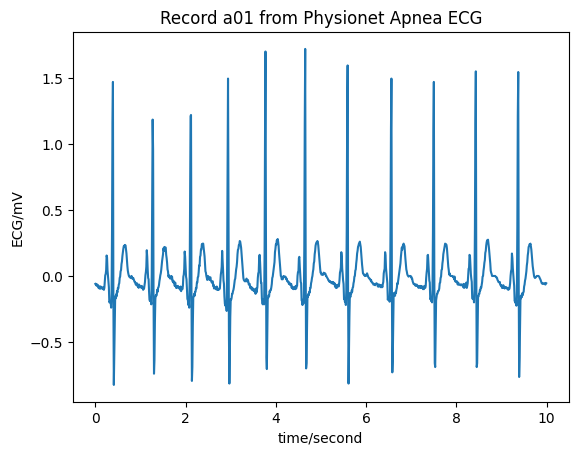

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        [-0.075],
        [-0.065],
        [-0.07 ],
        [-0.07 ],
        [-0.09 ],
        [-0.08 ],
        [-0.095],
        [-0.08 ],
        [-0.095],
        [-0.08 ],
        [-0.095],
        [-0.085],
        [-0.09 ],
        [-0.09 ],
        [-0.1  ],
        [-0.085],
        [-0.105],
        [-0.09 ],
        [-0.045],
        [ 0.005],
        [ 0.015],
        [ 0.045],
        [ 0.155],
        [ 0.14 ],
        [ 0.045],
        [ 0.005],
        [-0.04 ],
        [-0.085],
        [-0.2  ],
        [-0.195],
        [-0.2  ],
        [-0.2  ],
        [-0.24 ],
        [-0.13 ],
        [ 0.34 ],
        [ 1.155],
        [ 1.47 ],
        [-0.155],
        [-0.825],
        [-0.59 ],
        [-0.35 ],
     

In [ ]:
record = wfdb.rdrecord(record_name='/ecg_data/a01', sampfrom=0, sampto=1000,channels=None, physical=True, m2s=True, smooth_frames=True, ignore_skew=False, return_res=16, force_channels=True, channel_names=None, warn_empty=False)

wfdb.plot_wfdb(record, title='Record a01 from Physionet Apnea ECG')
display(record.__dict__)

- record_name: 읽어올 레코드의 파일 경로를 지정합니다.
- sampfrom: 읽어올 데이터의 시작 샘플 인덱스를 지정합니다.
- sampto: 읽어올 데이터의 마지막 샘플 인덱스를 지정합니다.
- channels: 읽어올 채널 번호 또는 채널 이름을 지정합니다.
- physical: True로 설정하면 데이터 값을 물리적 단위로 변환합니다.
- m2s: True로 설정하면 밀리세컨드 단위로 시간을 변환합니다.
- smooth_frames: True로 설정하면 평균화된 프레임을 반환합니다.
- ignore_skew: False로 설정하면 레코드의 시작을 조절하기 위해 skew 값을 무시합니다.
- return_res: 반환할 데이터의 비트 해상도를 지정합니다.
- force_channels: True로 설정하면 지정된 채널만 반환하며, False로 설정하면 채널이 없는 경우 모든 채널을 반환합니다.
- channel_names: 채널 이름의 목록을 지정합니다.
- warn_empty: True로 설정하면 비어 있는 채널에 대한 경고를 표시합니다.